In [ ]:
!wget  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2024-02-19 09:23:15--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-02-19 09:23:15 ERROR 403: Forbidden.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

In [ ]:
df=pd.read_csv('bbc_text_cls.csv')

In [ ]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [ ]:
df['target']= df['labels'].astype("category").cat.codes

In [ ]:
df_train,df_test=train_test_split(df, test_size=0.3)

In [ ]:
tfidf=TfidfVectorizer(stop_words='english')
Xtrain=tfidf.fit_transform(df_train['text'])
Xtest=tfidf.transform(df_test['text'])

In [ ]:
X_train= Xtrain.toarray()
X_test=Xtest.toarray()

In [ ]:
Ytrain=df_train['target']
Ytest=df_test['target']

In [ ]:
K=df['target'].max()+1
K

5

In [ ]:
D=X_train.shape[1]

In [ ]:
i=Input(shape=(D,))
x=Dense(300,activation='relu')(i)
x=Dense(K)(x)
model=Model(i,x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25202)]           0         
                                                                 
 dense (Dense)               (None, 300)               7560900   
                                                                 
 dense_1 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 7562405 (28.85 MB)
Trainable params: 7562405 (28.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
r=model.fit(
    X_train,Ytrain,
    validation_data=(X_test,Ytest),
    epochs=7,
    batch_size=128,
)

Epoch 1/7
13/13 [==============================] - 6s 304ms/step - loss: 1.4534 - accuracy: 0.8773 - val_loss: 1.1604 - val_accuracy: 0.9686
Epoch 2/7
13/13 [==============================] - 3s 264ms/step - loss: 0.8817 - accuracy: 0.9955 - val_loss: 0.6854 - val_accuracy: 0.9716
Epoch 3/7
13/13 [==============================] - 2s 186ms/step - loss: 0.4230 - accuracy: 0.9987 - val_loss: 0.3855 - val_accuracy: 0.9701
Epoch 4/7
13/13 [==============================] - 3s 218ms/step - loss: 0.1853 - accuracy: 0.9994 - val_loss: 0.2458 - val_accuracy: 0.9701
Epoch 5/7
13/13 [==============================] - 2s 178ms/step - loss: 0.0905 - accuracy: 0.9994 - val_loss: 0.1846 - val_accuracy: 0.9731
Epoch 6/7
13/13 [==============================] - 3s 217ms/step - loss: 0.0515 - accuracy: 1.0000 - val_loss: 0.1538 - val_accuracy: 0.9760
Epoch 7/7
13/13 [==============================] - 3s 248ms/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 0.1377 - val_accuracy: 0.9775


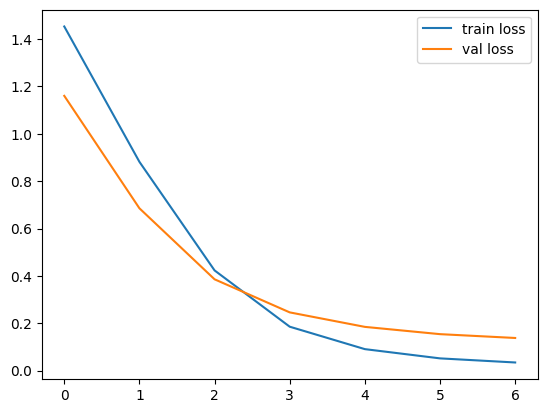

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()

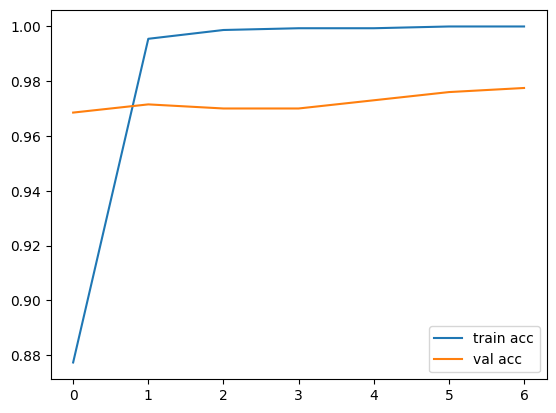

In [ ]:
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()

<Axes: >

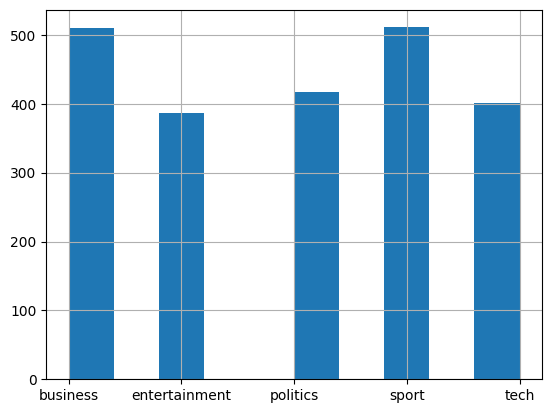

In [ ]:
df['labels'].hist()